In [61]:
from sklearn.cluster import KMeans, DBSCAN
from ast import literal_eval
from matplotlib.colors import ListedColormap, BoundaryNorm, Normalize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import umap.umap_ as umap
import matplotlib

matplotlib.rc('font', family='Heiti TC')

In [5]:
# read data from csv
df = pd.read_csv('test.csv', nrows=30810)

In [7]:
print(df.head(5))

   Unnamed: 0     name                     place_id                user_id  \
0           0  麒麟創作拉麵坊  ChIJRYLOKvmpQjQRSrAwjEP7e9I  110466093739231104001   
1           1  麒麟創作拉麵坊  ChIJRYLOKvmpQjQRSrAwjEP7e9I  100960361950426267904   
2           2  麒麟創作拉麵坊  ChIJRYLOKvmpQjQRSrAwjEP7e9I  105129428418363205426   
3           3  麒麟創作拉麵坊  ChIJRYLOKvmpQjQRSrAwjEP7e9I  107890985019526067340   
4           4  麒麟創作拉麵坊  ChIJRYLOKvmpQjQRSrAwjEP7e9I  103620193904175325358   

   rating                                           combined  n_tokens  \
0       5  Score: ★★★★★; Content: 聽說晚上場需要排隊領完號碼牌要等兩個小時才能領...       621   
1       4  Score: ★★★★; Content: 也是耳聞已久前來朝聖 進來環境跟以往拉麵店風格不...       458   
2       4  Score: ★★★★; Content: 開幕即巔峰的拉麵，特別起了一大早排第二個，點了特...       616   
3       4  Score: ★★★★; Content: 白松露🐔魚貝拉麵湯頭很鮮 但是蛤蜊有沙 麵條正常...       125   
4       5  Score: ★★★★★; Content: 今日和朋友去吃的餐點，平日去晚上17:30點餐...       590   

                                          embeddings  
0  [-0.020609794184565544, -0.0

In [10]:
print(df.shape)
df.drop_duplicates(subset=['place_id','user_id'],inplace=True)
print(df.shape)

(30810, 8)
(30367, 8)


In [12]:
# convert embeddings to np.array metrix
df["embeddings"] = df.embeddings.apply(literal_eval).apply(np.array)
matrix = np.vstack(df.embeddings.values)

# clustering
n_clusters = 8

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=3)
kmeans.fit(matrix)
labels = kmeans.labels_
df["Cluster"] = labels

In [59]:
df[df.name=="數寄屋 辻葉 ゆず塩鷄白湯らーめん專門店"].sort_values('n_tokens')

,Unnamed: 0,name,place_id,user_id,rating,combined,n_tokens,embeddings,Cluster,umap_1,umap_2
5854,1617,數寄屋 辻葉 ゆず塩鷄白湯らーめん專門店,ChIJB6MrhBepQjQRwuetBgPipaM,105477646059617676800,5,Score: ★★★★★; Content: 吃完超滿足的！點了濃湯下次試試清湯～,36,"[0.017451297491788864, -0.01715902052819729, -...",0,4.318042,4.170937
5778,1541,數寄屋 辻葉 ゆず塩鷄白湯らーめん專門店,ChIJB6MrhBepQjQRwuetBgPipaM,115970529454559494023,5,Score: ★★★★★; Content: 超好吃！ 濃湯跟清湯派都可以接受的柚子鹽拉麵><,44,"[-0.015918012708425522, -0.038005977869033813,...",7,3.995680,5.337085
5802,1565,數寄屋 辻葉 ゆず塩鷄白湯らーめん專門店,ChIJB6MrhBepQjQRwuetBgPipaM,106938095852151583202,4,Score: ★★★★; Content: 拉麵就分清湯及濃湯兩種，各有特色，環境簡單優雅,50,"[-0.013892879709601402, -0.01484709233045578, ...",2,3.420873,5.025666
5821,1584,數寄屋 辻葉 ゆず塩鷄白湯らーめん專門店,ChIJB6MrhBepQjQRwuetBgPipaM,102892459254146053750,4,Score: ★★★★; Content: 點了清和濃的各一碗 比較喜歡清的湯頭 喝起來很舒服～,50,"[0.023958606645464897, -0.022667156532406807, ...",0,4.475897,4.108464
5792,1555,數寄屋 辻葉 ゆず塩鷄白湯らーめん專門店,ChIJB6MrhBepQjQRwuetBgPipaM,108225244505877174954,4,Score: ★★★★; Content: 沫白辻葉雞湯拉麵（濃湯）和煙燻柗露叉燒盛合好吃,55,"[0.01362000871449709, -0.03759032487869263, -0...",6,5.487055,7.864299
...,...,...,...,...,...,...,...,...,...,...,...
5805,1568,數寄屋 辻葉 ゆず塩鷄白湯らーめん專門店,ChIJB6MrhBepQjQRwuetBgPipaM,107956786853632366424,5,Score: ★★★★★; Content: 雅白辻葉雞湯拉麵(清湯)🍜$260 鴨胸叉燒飯...,892,"[-0.014043229632079601, -0.016795925796031952,...",3,3.789632,9.059777
5852,1615,數寄屋 辻葉 ゆず塩鷄白湯らーめん專門店,ChIJB6MrhBepQjQRwuetBgPipaM,103728390737120615711,4,Score: ★★★★; Content: 2021.10.23 = ★★★★☆ ◉推薦：沫...,1017,"[-0.016337377950549126, -0.011926064267754555,...",3,3.232438,9.280320
5799,1562,數寄屋 辻葉 ゆず塩鷄白湯らーめん專門店,ChIJB6MrhBepQjQRwuetBgPipaM,100166110372729535768,5,Score: ★★★★★; Content: 拉麵地圖get+1 整體評價：⭐️⭐️⭐️⭐️...,1022,"[-0.016039134934544563, 0.013218458741903305, ...",3,2.736183,9.979033
5809,1572,數寄屋 辻葉 ゆず塩鷄白湯らーめん專門店,ChIJB6MrhBepQjQRwuetBgPipaM,100642278088141661244,5,Score: ★★★★★; Content: -數寄屋 辻葉- 台電大樓步行約8分鐘，師大...,1027,"[-0.026564832776784897, -0.02947068400681019, ...",3,2.872315,9.279518


In [19]:
# create UMAP reducer
reducer = umap.UMAP(n_neighbors=100,min_dist=0.1, n_components=2, metric='cosine')
data_umap = reducer.fit_transform(matrix)

In [68]:

df['umap_1'] = data_umap[:, 0]
df['umap_2'] = data_umap[:, 1]
colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.arange(-0.5, n_clusters + 0.5, 1), cmap.N)


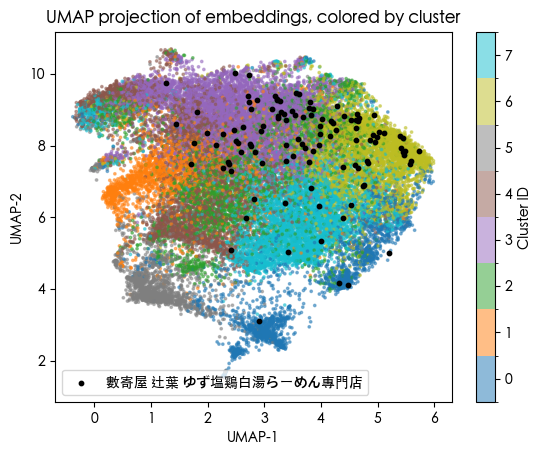

In [71]:
mask = df['name'] == "數寄屋 辻葉 ゆず塩鷄白湯らーめん專門店"

scatter = plt.scatter('umap_1', 'umap_2', s=3, c=labels, cmap=cmap, data=df,
                        norm=norm, alpha=0.5,label='')
plt.scatter(data_umap[mask, 0], data_umap[mask, 1], s=10, color='black',
                        alpha=1, label='數寄屋 辻葉 ゆず塩鷄白湯らーめん專門店')
plt.colorbar(scatter, ticks=np.arange(n_clusters), label='Cluster ID')  # Adjust colorbar to show discrete values
plt.title('UMAP projection of embeddings, colored by cluster')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend()

/var/folders/3k/syzcms_55r97fjwz1s3h8kkm0000gn/T/ipykernel_66280/248670960.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df['n_tokens'], fill=True, common_norm=False, palette="crest",


Text(0, 0.5, 'Probability Density')

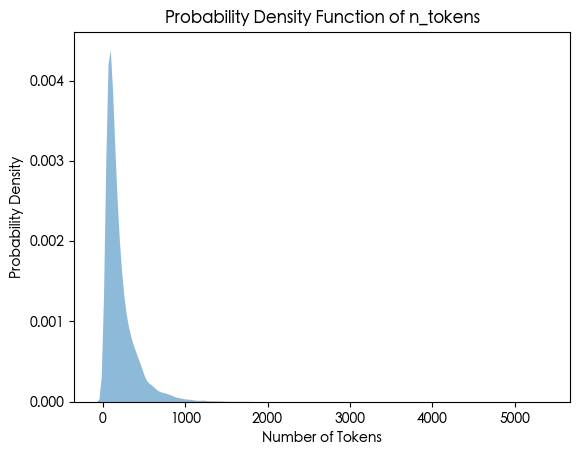

In [93]:
sns.kdeplot(df['n_tokens'], fill=True, common_norm=False, palette="crest",
            alpha=.5, linewidth=0)
plt.title('Probability Density Function of n_tokens')
plt.xlabel('Number of Tokens')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Density')

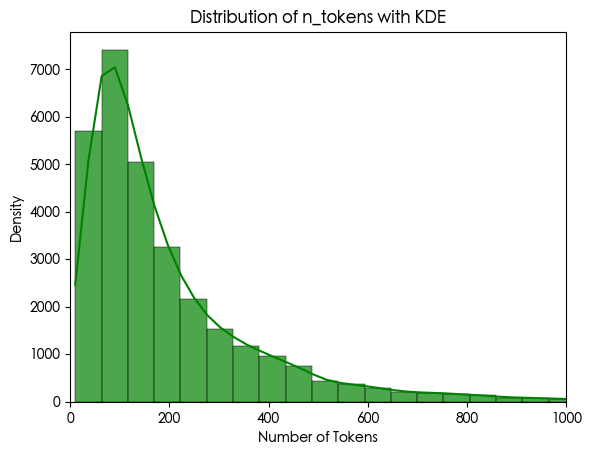

In [97]:
sns.histplot(df['n_tokens'], kde=True, color='green', bins=100, alpha=0.7)
plt.xlim(0,1000)
plt.title('Distribution of n_tokens with KDE')
plt.xlabel('Number of Tokens')
plt.ylabel('Density')

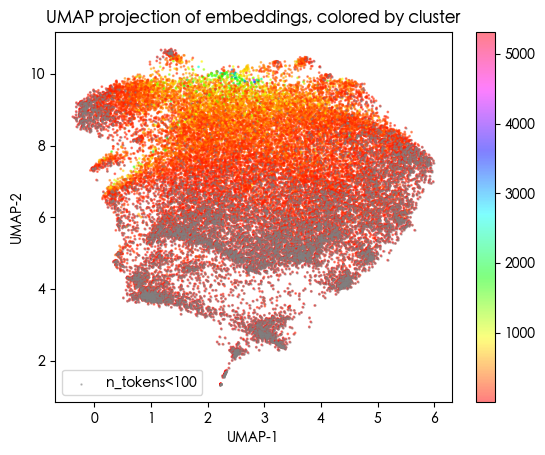

In [99]:
norm = Normalize(vmin=df['n_tokens'].min(), vmax=df['n_tokens'].max())

scatter2 = plt.scatter('umap_1', 'umap_2', s=1, c='n_tokens', cmap='hsv', data=df,
                        alpha=0.5,label='')
plt.colorbar(scatter2)
plt.title('UMAP projection of embeddings, colored by cluster')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')

mask = df['n_tokens'] < 100
plt.scatter(data_umap[mask, 0], data_umap[mask, 1], s=0.5, color='gray',
                        alpha=0.5, label='n_tokens<100')
plt.legend()

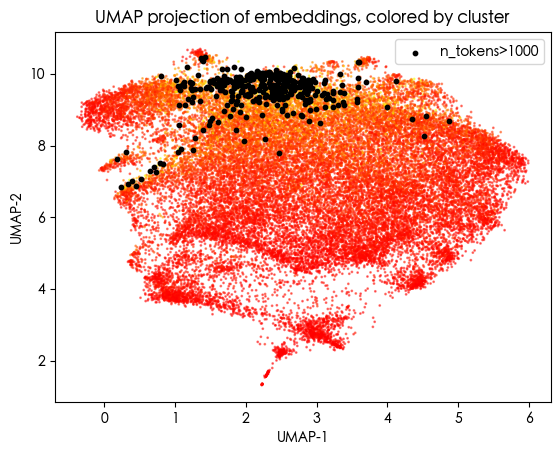

In [92]:
plt.scatter('umap_1', 'umap_2', s=1, c='n_tokens', cmap='hsv', data=df,
                        alpha=0.5,label='')
plt.colorbar(scatter2)
plt.title('UMAP projection of embeddings, colored by cluster')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')

mask = (df['n_tokens'] > 1000) & (df['n_tokens'] < 4000)
plt.scatter(data_umap[mask, 0], data_umap[mask, 1], s=10, color='black',
                        alpha=1, label='n_tokens>1000')
plt.legend()